<a href="https://colab.research.google.com/github/ChetanM1987/Covid-19-Pandemic-Analysis/blob/main/Data_analyst_assignment_March_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load dataset**

In [3]:
data = "//content/Data_Analyst_Assignment_Dataset.csv"
df = pd.read_csv(data)
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA


**Calculate Risk Labels**

In [4]:
def calculate_risk(row):
    if row['Bounce String'] == 'FEMI' or 'B' in row['Bounce String'] or 'L' in row['Bounce String']:
        return "High Risk"
    elif row['Bounce String'] == 'SS' or 'H' in row['Bounce String']:
        return "Low Risk"
    elif row['Bounce String'].count('B') < 2 and 'S' in row['Bounce String']:
        return "Medium Risk"
    else:
        return "Unknown Risk"

In [5]:
# Create a new column for risk labels
df['Risk Label'] = df.apply(calculate_risk, axis=1)
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Medium Risk
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Medium Risk
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk


**Define Tenure Labels**

In [6]:
def label_tenure(row):
    if row['Tenure'] == 3:
        return "Early Tenure"
    elif row['Tenure'] == row['Tenure']:
        return "Mid Tenure"
    elif row['Tenure'] == row['Tenure'] - 3:
        return "Late Tenure"

In [7]:
# Create a new column for tenure labels
df['Tenure Label'] = df.apply(label_tenure, axis=1)
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Medium Risk,Mid Tenure
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Mid Tenure
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Medium Risk,Mid Tenure
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Mid Tenure


**Distribute into Ticket Size Cohorts**

In [8]:
# Calculate sum of amount pending for each borrower
sum_amount_pending = df.groupby('Loan Number')['Amount Pending'].sum().reset_index()

# Determine cohort boundaries
cohort_boundaries = sum_amount_pending['Amount Pending'].quantile([0.33, 0.66])

# Define a function to label borrowers based on ticket size cohorts
def label_ticket_size(amount):
    if amount <= cohort_boundaries.iloc[0]:
        return "Low Ticket Size"
    elif amount <= cohort_boundaries.iloc[1]:
        return "Medium Ticket Size"
    else:
        return "High Ticket Size"

In [9]:
# Create a new column for ticket size labels
df['Ticket Size'] = sum_amount_pending['Amount Pending'].apply(label_ticket_size)
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Size
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Medium Risk,Mid Tenure,Medium Ticket Size
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Mid Tenure,Medium Ticket Size
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,High Ticket Size
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Medium Risk,Mid Tenure,Low Ticket Size
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Mid Tenure,High Ticket Size


**Segment Borrowers into Spend Categories**

In [10]:
def spend_recommendation(row):
    if row['Risk Label'] == "Low Risk" and row['Tenure Label'] == "Early Tenure":
        return "Digital"
    elif row['Risk Label'] == "Low Risk" or row['Risk Label'] == "Medium Risk":
        return "Voice Bot"
    else:
        return "Human Calling"

In [11]:
# Create a new column for spend categories
df['Spend Category'] = df.apply(spend_recommendation, axis=1)
df.head()

,Amount Pending,State,Tenure,Interest Rate,City,Bounce String,Disbursed Amount,Loan Number,Risk Label,Tenure Label,Ticket Size,Spend Category
0,963,Karnataka,11,7.69,Bangalore,SSS,10197,JZ6FS,Medium Risk,Mid Tenure,Medium Ticket Size,Voice Bot
1,1194,Karnataka,11,6.16,Bangalore,SSB,12738,RDIOY,High Risk,Mid Tenure,Medium Ticket Size,Human Calling
2,1807,Karnataka,14,4.24,Hassan,BBS,24640,WNW4L,High Risk,Mid Tenure,High Ticket Size,Human Calling
3,2451,Karnataka,10,4.70,Bangalore,SSS,23990,6LBJS,Medium Risk,Mid Tenure,Low Ticket Size,Voice Bot
4,2611,Karnataka,10,4.41,Mysore,SSB,25590,ZFZUA,High Risk,Mid Tenure,High Ticket Size,Human Calling


**Channel Spend Recommendations**

In [12]:
# Analyze digital channel suitability
digital_suitable = (df["Risk Label"] == "Low Risk") | (df["Bounce String"] == "FEMI") | (df["Amount Pending"] < 1000)

**Analyze voice bot suitability**

In [13]:
# Define a list of metro cities
metro_cities = ["Mumbai","Pune","Hyderabad","Banglore"]
voice_bot_suitable = (df["Risk Label"].isin(["Low Risk", "Medium Risk"])) & (df["City"].isin(metro_cities)) & ~(df["Amount Pending"] >= 2000)

**Cost calculation**

In [14]:
digital_cost = 5
voice_bot_cost = 10
telecalling_cost = 50

def calculate_cost(channel, n_borrowers):
    if channel == "Digital":
        return n_borrowers * digital_cost
    elif channel == "Voice Bot":
        return n_borrowers * voice_bot_cost
    else:
        return n_borrowers * telecalling_cost

**Channel assignment based on suitability and cost minimization**

In [15]:
def assign_channel(digital_suitable, voice_bot_suitable, data):
    data["Channel"] = "Telecalling"
    data.loc[digital_suitable, "Channel"] = "Digital"
    data.loc[voice_bot_suitable & ~digital_suitable, "Channel"] = "Voice Bot"
    digital_cost = calculate_cost("Digital", data[data["Channel"] == "Digital"].shape[0])
    voice_bot_cost = calculate_cost("Voice Bot", data[data["Channel"] == "Voice Bot"].shape[0])
    telecalling_cost = calculate_cost("Telecalling", data[data["Channel"] == "Telecalling"].shape[0])

    return digital_cost, voice_bot_cost, telecalling_cost

**1. Summary of borrowers based on risk with graph**

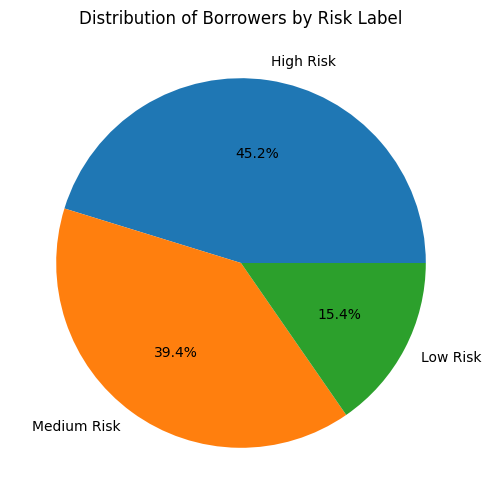

In [37]:
from matplotlib.pyplot import pie

# Group data by risk label and calculate counts
risk_counts = df['Risk Label'].value_counts().sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Borrowers by Risk Label")
plt.show()

**2. Summary of borrowers based on ticket sizes with graph**

<ipython-input-70-2a22e237edce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Ticket Size", data=df, palette="Set3")


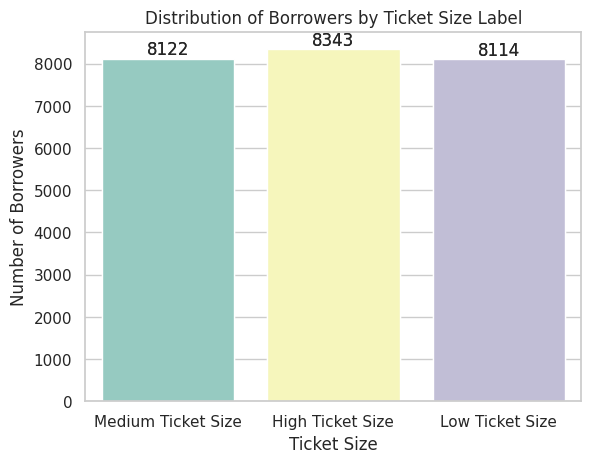

In [70]:
ax = sns.countplot(x = 'Ticket Size',data = df)
sns.set_theme(style="whitegrid")
sns.countplot(x="Ticket Size", data=df, palette="Set3")
plt.xlabel("Ticket Size")
plt.ylabel("Number of Borrowers")
plt.title("Distribution of Borrowers by Ticket Size Label")
for bars in ax.containers:
    ax.bar_label(bars)

**3. Summary of borrowers based on tenure completion with graph**

<ipython-input-79-803326757cc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tenure Label", data=df, palette="deep")


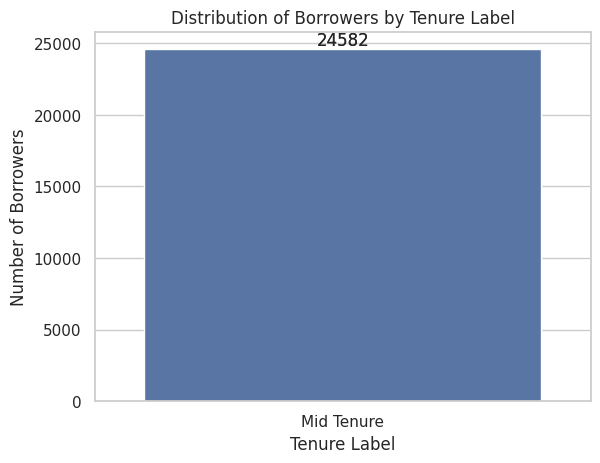

In [79]:
ax = sns.countplot(x = 'Tenure Label',data = df)
sns.set_theme(style="whitegrid")
sns.countplot(x="Tenure Label", data=df, palette="deep")
plt.title("Distribution of Borrowers by Tenure Label")
plt.xlabel("Tenure Label")
plt.ylabel("Number of Borrowers")
for bars in ax.containers:
    ax.bar_label(bars)

**4. Spend recommendation**

The code calculates the total cost for each channel ("Digital", "Voice Bot", "Telecalling") based on the assigned channels and cost structure. You can use this information to discuss your spend minimization strategy in the report.

**Prioritizing cost-effective channels:** The analysis recommends prioritizing digital channels for low-risk borrowers and first-time borrowers (FEMI) due to their lower costs.

**Leveraging voice bots strategically:** Voice bots are suitable for borrowers in metro cities with a good or medium risk profile and lower to medium loan amounts. They offer a balance between cost and personalization.

**Using telecalling judiciously:** Telecalling, being the most expensive option, is reserved for high-risk borrowers or those not suitable for other channels due to location or high loan amounts.